# Marvellous Comics: mirror of society?
Superheroes and villains in comics can have a real impact on society. They’re supposed to represent what’s good and bad. Thus, the way the character is portrayed will have an influence on the reader. If for example all villains are part of the same minority, people will unconsciously see them in real life as bad people. Moreover, a character like Tony Stark could inspire people to study engineering. And these are just examples to illustrate the power comics can have on us.
We can thus study this choice of characters, how diverse it is, and if there is a tendency towards a specific portrait for superheroes and villains. 

## Data Acquisition
Here, the aim is to load the datasets, merge and combine them. Build the datawarehouse, that is easy to work on.

### Parsing the web, and loading dataset from web

In [184]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import math

### Make the database ready-to-use

In [127]:
personnage = pd.read_pickle("personnage_url.txt")
personnage.head(5)

,URL,Real Name,Identity,Current Alias,Citizenship,Marital Status,Occupation,Education,Gender,Height,Weight,Eyes,Hair,Place of Birth
0,/wiki/Aaron_the_Aakon_(Earth-616),Aaron,Secret Identity,,Aakon,Single,Slave trader,,Male,,,Brown,Black,Planet Oorga
1,/wiki/2-D_(Earth-616),Darell (full name unrevealed)[1],Secret Identity,2-D,American,Single,Adventurer,,Male,,,Brown,Brown,
2,/wiki/Abraham_Erskine_(Earth-616),Abraham Erskine[1],Known to Authorities Identity,Dr. Joseph Reinstein,"German, American",Married,Scientist,Advanced College Degree,Male,"5' 6"" (1.68 m)",160 lbs (73 kg),Brown,Black (graying),Germany
3,/wiki/11-Ball_(Earth-616),nknown,Secret Identity,11-Ball,American,Single,Professional criminal; former henchman,,Male,,,,,
4,/wiki/Abraham_(Earth-616),Abraham,No Dual Identity,,,Married,Prophet,,Male,,,,Black,


## Data acquaintance

In [128]:
#Check if we have any missing values
personnage.isnull().values.any()

False

***Now, we will have a look at every column and study how there are filled in order to better comprehend the data and clean it***

In [129]:
#We start with the Real Name of the characters
personnage['Real Name'].value_counts()

nknown                                                       3666
Unknown                                                       462
Unrevealed                                                    108
Not Applicable                                                 27
Unknown (The symbiote takes the name of its current host)      24
                                                             ... 
Amaunet[1]                                                      1
Gloria Brickman                                                 1
Zoe Culloden (original name unrevealed)                         1
Alex Kurtz                                                      1
Maria Russoff                                                   1
Name: Real Name, Length: 22947, dtype: int64

***Regarding the real Name, we can observe that we have a few categories of unknown names, we are going to group them together under the label 'Unknown'***

In [130]:
personnage.loc[personnage['Real Name']=='nknown', 'Real Name'] ='Unknown'
personnage.loc[personnage['Real Name']=='Unrevealed', 'Real Name'] ='Unknown'
personnage.loc[personnage['Real Name']=='', 'Real Name'] ='Unknown'
personnage.loc[personnage['Real Name']=='N/A', 'Real Name'] ='Unknown'
personnage.loc[personnage['Real Name']=='Unknown (The symbiote takes the name of its current host)', 'Real Name'] ='Unknown'
personnage.loc[personnage['Real Name']=='None', 'Real Name'] ='Unknown'
personnage["Real Name"] = personnage["Real Name"].str.replace(r'\s\[\d\]', '')
personnage["Real Name"] = personnage["Real Name"].str.replace(r'\[\d\]', '')
personnage['Real Name'].value_counts()

Unknown                          4297
Not Applicable                     27
Martin (full name unrevealed)      11
James "Jamie" Arthur Madrox        10
Thor Odinson                        6
                                 ... 
Tae                                 1
Astrella Carpenter                  1
Marinus van der Lubbe               1
Rzh'arr                             1
Dona Little                         1
Name: Real Name, Length: 22866, dtype: int64

***We now look at the identity of the characters***

In [131]:
personnage["Identity"].value_counts()

No Dual Identity                                                                                                                                                      14653
Secret Identity                                                                                                                                                        7311
Public Identity                                                                                                                                                        2953
                                                                                                                                                                       2882
Known to Authorities Identity                                                                                                                                           144
No Dual Identity [1]                                                                                                                        

***It looks like the identities are distribiuted among 'No Dual Identity', 'Secret Identity', 'Public Identity' and 'Known to Authorities Identity'***

In [132]:
personnage["Identity"] = personnage["Identity"].str.replace(r'\s\[\d\]', '')
personnage["Identity"] = personnage["Identity"].str.replace(r'\[\d\]', '')
personnage["Identity"] = personnage["Identity"].replace([''], 'Unknown')
personnage.loc[personnage['Identity'].str.contains('Dual'), 'Identity'] = 'No Dual Identity'
personnage.loc[personnage['Identity'].str.contains('Authorities'), 'Identity'] = 'Known to Authorities Identity'
personnage.loc[personnage['Identity'].str.contains('Public'), 'Identity'] = 'Public Identity'
personnage.loc[personnage['Identity'].str.contains('Secret'), 'Identity'] = 'Secret Identity'
personnage.loc[personnage['Identity'].str.contains('Dial'), 'Identity'] = 'No Dual Identity'
personnage.loc[personnage['Identity'].str.contains('Robot'), 'Identity'] = 'Public Identity'
personnage["Identity"].value_counts()

No Dual Identity                 14677
Secret Identity                   7331
Public Identity                   2965
Unknown                           2882
Known to Authorities Identity      154
Name: Identity, dtype: int64

***We continue with the Alias***

In [133]:
personnage["Current Alias"].value_counts()

                        15844
Nova                       28
Ghost Rider                16
Crimson Dynamo             16
Black Knight               15
                        ...  
Säurespritze                1
Unus the Untouchable        1
Coldwar                     1
Mister Brownstone           1
Benny Beckley               1
Name: Current Alias, Length: 10047, dtype: int64

In [134]:
personnage.loc[personnage['Current Alias']=='', 'Current Alias'] ='Unknown'
personnage['Current Alias'] = personnage['Current Alias'].str.replace(r'\s\[\d\]', '')
personnage['Current Alias'] = personnage['Current Alias'].str.replace(r'\[\d\]', '')
personnage["Current Alias"].value_counts().head(50)

Unknown             15845
Nova                   28
Ghost Rider            18
Crimson Dynamo         16
Black Knight           16
Captain America        14
Guardsman              14
Smasher                14
Baron Zemo             13
Wendigo                11
Cyclops                11
Executioner            11
Black Widow            11
Hobgoblin              11
Vulture                10
Black Panther           9
Aries                   9
Hulk                    9
Wolverine               9
Beetle                  9
Sentry                  9
Thor                    8
Beast                   8
Fang                    8
Iron Man                8
Scarlet Spider          8
Red Skull               8
Brain                   8
Spider-Man              8
Jack O'Lantern          7
Mister Fantastic        7
Firebrand               7
Captain Marvel          7
Venom                   7
Ms. Marvel              7
Iron Fist               7
Scarlet Knight          7
Spike                   7
Scourge     

***Citizenship***

In [135]:
personnage["Citizenship"].value_counts()

American                  10392
                           8188
United States               520
British                     499
German                      469
                          ...  
American, Krakoan, [1]        1
Blips                         1
Laxidazian                    1
Idlewood                      1
Uzbekistani                   1
Name: Citizenship, Length: 1546, dtype: int64

In [136]:
personnage.loc[personnage["Citizenship"]=="", 'Citizenship'] = 'Unknown'
personnage.loc[personnage["Citizenship"]=="USA", 'Citizenship'] = 'American'
personnage.loc[personnage["Citizenship"]=="United States of America", 'Citizenship'] = 'American'
personnage.loc[personnage["Citizenship"]=="United States", 'Citizenship'] = 'American'
personnage.loc[personnage["Citizenship"]=="America", 'Citizenship'] = 'American'
personnage.loc[personnage["Citizenship"]=="British, English", 'Citizenship'] = 'British'
personnage.loc[personnage["Citizenship"]=="United Kingdom", 'Citizenship'] = 'British'
personnage.loc[personnage["Citizenship"]=="English", 'Citizenship'] = 'British'
personnage.loc[personnage["Citizenship"]=="Scottish, British", 'Citizenship'] = 'British'
personnage.loc[personnage["Citizenship"]=="British, Scottish", 'Citizenship'] = 'British'
personnage.loc[personnage["Citizenship"]=="English, British", 'Citizenship'] = 'British'
personnage["Citizenship"] = personnage["Citizenship"].str.replace(r'\s\[\d\]', '')
personnage["Citizenship"] = personnage["Citizenship"].str.replace(r'\[\d\]', '')
personnage["Citizenship"].value_counts()

American                                                                 11033
Unknown                                                                   8190
British                                                                    731
German                                                                     469
Canadian                                                                   327
                                                                         ...  
Halfworlder                                                                  1
Soulworld                                                                    1
Cragmouth                                                                    1
Lycian                                                                       1
Japanese, (with no known criminal record,  possibly legally deceased)        1
Name: Citizenship, Length: 1527, dtype: int64

***Marital Status***

In [137]:
personnage["Marital Status"].value_counts()

                                                                                            16788
Single                                                                                       7993
Married                                                                                      2190
Widowed                                                                                       608
Divorced                                                                                      255
Separated                                                                                      64
Engaged                                                                                        49
Married [1]                                                                                     4
Married [citation needed]                                                                       4
Single [1]                                                                                      3
Married (presumably)

In [138]:
personnage.loc[personnage["Marital Status"]=="", 'Marital Status'] = 'Unknown'
personnage["Marital Status"] = personnage["Marital Status"].str.replace(r'\s\[\d+\]', '')
personnage["Marital Status"] = personnage["Marital Status"].str.replace(r'\[\d+\]', '')
personnage["Marital Status"].value_counts()

Unknown                                                                                     16788
Single                                                                                       7997
Married                                                                                      2196
Widowed                                                                                       610
Divorced                                                                                      257
Separated                                                                                      67
Engaged                                                                                        49
Married [citation needed]                                                                       4
Single (presumed)                                                                               4
Divorced ; Widowed                                                                              2
Married (presumably)

***Occupation***

In [139]:
personnage["Occupation"].value_counts()

                                                     8700
Student                                               645
Criminal                                              600
Scientist                                             428
Adventurer                                            321
                                                     ... 
Crimelord, scientist, businessman                       1
Former CEO of Patsy Walker Enterprises                  1
Industrialist, Westman Construction Company owner       1
Embezzler                                               1
Gorilla-god                                             1
Name: Occupation, Length: 9029, dtype: int64

In [140]:
personnage[personnage["Occupation"]==""] = 'Unknown'
personnage["Occupation"] = personnage["Occupation"].str.replace(r'\s\[\d+\]', '')
personnage["Occupation"] = personnage["Occupation"].str.replace(r'\[\d+\]', '')
personnage["Occupation"].value_counts()

Unknown                                        8701
Student                                         645
Criminal                                        601
Scientist                                       428
Adventurer                                      322
                                               ... 
Adventurer; former football player                1
Military captain, Gestapo commander               1
Truck stop owner; Truck driver                    1
Palace chief of operations; formerly regent       1
Keeper of Memory                                  1
Name: Occupation, Length: 8983, dtype: int64

***Education***

In [141]:
personnage["Education"].value_counts()

                                                                                                 17561
Unknown                                                                                           8705
Artificial Intelligence                                                                             51
Trained on an unnamed world to be a spy                                                             51
High School                                                                                         34
                                                                                                 ...  
University of Wisconsin (Madison)--Law Degree                                                        1
Programming from Kree Science Council, absorption of many minds                                      1
Extensively self-educated in many general areas, assisted by the cyborg implants in his brain        1
College educated.                                                        

In [142]:
personnage.loc[personnage["Education"]=="", 'Education'] = 'Unknown'
personnage.loc[personnage["Education"]=="Unrevealed", 'Education'] = 'Unknown'
personnage["Education"] = personnage["Education"].str.replace(r'\s\[\d+\]', '')
personnage["Education"] = personnage["Education"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Education"]=="High school graduate", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High School Graduate", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High School graduate", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High School student", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High School Student", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High school student", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High-school dropout", 'Education'] = 'High School Dropout'
personnage.loc[personnage["Education"]=="High school dropout", 'Education'] = 'High School Dropout'
personnage.loc[personnage["Education"]=="High school drop-out", 'Education'] = 'High School Dropout'
personnage.loc[personnage["Education"]=="High school", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="Some high school", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="Some college", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="College Graduate", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="College graduate", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="College educated", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="College education", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="College degree", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="University graduate", 'Education'] = 'University'
personnage.loc[personnage["Education"]=="Ph.D.", 'Education'] = 'Doctorate'
personnage.loc[personnage["Education"]=="PhD", 'Education'] = 'Doctorate'
personnage["Education"].value_counts()

Unknown                                             26276
High School                                           152
College                                                71
Trained on an unnamed world to be a spy                51
Artificial Intelligence                                51
                                                    ...  
Current High School Student                             1
Degree in psychology from Columbia University           1
PhD in Nuclear Physics                                  1
Probably PhD in Physics or Astrophysics                 1
Extensive in magical arts and occult lore, latin        1
Name: Education, Length: 1046, dtype: int64

In [143]:
personnage["Gender"].value_counts()

Male                                                                  14699
Unknown                                                                8700
Female                                                                 4106
                                                                        368
Agender                                                                 102
Genderfluid                                                               9
Male[1]                                                                   4
Gestalt                                                                   2
Transgender                                                               2
Female[1][2]                                                              1
Mobile                                                                    1
Male(probably)                                                            1
Female(as Shub-Niggurath),[3]male(as Sahb Delanzar)[4] (see notes)        1
Male/Female[

In [144]:
personnage["Gender"] = personnage["Gender"].str.replace(r'\s\[\d+\]', '')
personnage["Gender"] = personnage["Gender"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Gender"]=="", 'Gender'] = 'Unknown'
personnage.loc[personnage["Gender"]=="UNCLEAR", 'Gender'] = 'Unknown'
personnage.loc[personnage["Gender"]=="Male/Female", 'Gender'] = 'Unknown'
personnage.loc[personnage["Gender"]=="Female(as Shub-Niggurath),male(as Sahb Delanzar) (see notes)", 'Gender'] = 'Genderfluid'
personnage.loc[personnage["Gender"]=="Male(Originally), Genderfluid (as shapeshifter)", 'Gender'] = 'Genderfluid'
personnage.loc[personnage["Gender"]=="Mobile", 'Gender'] = 'Genderfluid'
personnage.loc[personnage["Gender"]=="Female, (formerly Male)", 'Gender'] = 'Transgender'
personnage.loc[personnage["Gender"]=="Female(Female Clone of Male)", 'Gender'] = 'Female'
personnage.loc[personnage["Gender"]=="Male, merged with a mortal female", 'Gender'] = 'Male'
personnage.loc[personnage["Gender"]=="Male(probably)", 'Gender'] = 'Male'
personnage.loc[personnage['Gender'].str.contains('Agender'), 'Gender'] = 'Agender'
personnage["Gender"].value_counts()

Male           14706
Unknown         9072
Female          4108
Agender          106
Genderfluid       12
Transgender        3
Gestalt            2
Name: Gender, dtype: int64

***Height***

In [145]:
personnage["Height"].value_counts()

                                                  16241
Unknown                                            8700
6' 0" (1.83 m)                                      248
Variable                                            224
5' 11" (1.80 m)                                     212
                                                  ...  
5' 9" (1.75 m) (as Nettles); 6'3" (as Megatak)        1
5' 8" (1.73 m) , (6'8" as Protector)                  1
20' 0" (6.10 m) [verification needed]                 1
37' 6" (11.43 m) (as Raptor)                          1
6' 2" (1.88 m) ;6'5" in armor                         1
Name: Height, Length: 527, dtype: int64

In [146]:
personnage["Height"] = personnage["Height"].str.replace(r'\s\[\d+\]', '')
personnage["Height"] = personnage["Height"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Height"]=="", "Height"] = 'Unknown'
personnage.loc[personnage["Height"]=="Unknown ", "Height"] = 'Unknown'
personnage.loc[personnage["Height"]=="Incalculable ", "Height"] = 'Unknown'
personnage.loc[personnage["Height"]=="Variable ", "Height"] = 'Variable'
personnage.loc[personnage["Height"]=="variable ", "Height"] = 'Variable'
personnage["Height"].value_counts().head()

Unknown            24949
6' 0" (1.83 m)       250
Variable             235
5' 11" (1.80 m)      215
5' 10" (1.78 m)      214
Name: Height, dtype: int64

***Weight***

In [147]:
personnage["Weight"].value_counts()

                                       16361
Unknown                                 8700
Variable                                 218
180 lbs (82 kg)                           91
175 lbs (79 kg)                           83
                                       ...  
190 lbs (86 kg) (variable)                 1
185 lbs (84 kg) (Varable)                  1
9 lbs (4 kg) (Variable)                    1
Variable (from 0 to 146000 tons)[5]        1
334 lbs (151 kg)                           1
Name: Weight, Length: 794, dtype: int64

In [148]:
personnage["Weight"] = personnage["Weight"].str.replace(r'\s\[\d+\]', '')
personnage["Weight"] = personnage["Weight"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Weight"]=="", "Weight"] = 'Unknown'
personnage.loc[personnage["Weight"]=="Unknown ", "Weight"] = 'Unknown'
personnage.loc[personnage["Weight"]=="variable ", "Weight"] = 'Variable'
personnage.loc[personnage["Weight"]=="Variable ", "Weight"] = 'Variable'
personnage["Weight"].value_counts()

Unknown                         25069
Variable                          228
180 lbs (82 kg)                    92
175 lbs (79 kg)                    84
190 lbs (86 kg)                    80
                                ...  
185 lbs (84 kg) (Varable)           1
9 lbs (4 kg) (Variable)             1
195 lbs (88 kg) (when solid)        1
52 lbs (24 kg)                      1
2050 lbs (930 kg)                   1
Name: Weight, Length: 775, dtype: int64

***Eye***

In [149]:
personnage["Eyes"] = personnage["Eyes"].str.replace(r'\s\[\d+\]', '')
personnage["Eyes"] = personnage["Eyes"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Eyes"]=="", "Eyes"] = 'Unknown'
personnage['Eyes'].value_counts().head(10)

Unknown    18766
Brown       3071
Blue        2540
Black        739
Green        668
Red          432
White        320
Yellow       229
Grey         122
Hazel        110
Name: Eyes, dtype: int64

***Hair***

In [150]:
personnage["Hair"] = personnage["Hair"].str.replace(r'\s\[\d+\]', '')
personnage["Hair"] = personnage["Hair"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Hair"]=="", "Hair"] = 'Unknown'
personnage['Eyes'].value_counts().head(10)

Unknown    18766
Brown       3071
Blue        2540
Black        739
Green        668
Red          432
White        320
Yellow       229
Grey         122
Hazel        110
Name: Eyes, dtype: int64

In [151]:
personnage["Place of Birth"] = personnage["Place of Birth"].str.replace(r'\s\[\d+\]', '')
personnage["Place of Birth"] = personnage["Place of Birth"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Place of Birth"]=="", "Place of Birth"] = 'Unknown'
personnage["Place of Birth"].value_counts().head(10)

Unknown                    24154
Germany                      172
Skrull Empire                 78
Atlantis                      73
Japan                         69
New York City, New York       68
United Kingdom                66
Attilan                       59
Asgard                        51
Wakanda                       40
Name: Place of Birth, dtype: int64

In [152]:
personnage.head(20)

,URL,Real Name,Identity,Current Alias,Citizenship,Marital Status,Occupation,Education,Gender,Height,Weight,Eyes,Hair,Place of Birth
0,/wiki/Aaron_the_Aakon_(Earth-616),Aaron,Secret Identity,Unknown,Aakon,Single,Slave trader,Unknown,Male,Unknown,Unknown,Brown,Black,Planet Oorga
1,/wiki/2-D_(Earth-616),Darell (full name unrevealed),Secret Identity,2-D,American,Single,Adventurer,Unknown,Male,Unknown,Unknown,Brown,Brown,Unknown
2,/wiki/Abraham_Erskine_(Earth-616),Abraham Erskine,Known to Authorities Identity,Dr. Joseph Reinstein,"German, American",Married,Scientist,Advanced College Degree,Male,"5' 6"" (1.68 m)",160 lbs (73 kg),Brown,Black (graying),Germany
3,/wiki/11-Ball_(Earth-616),Unknown,Secret Identity,11-Ball,American,Single,Professional criminal; former henchman,Unknown,Male,Unknown,Unknown,Unknown,Unknown,Unknown
4,/wiki/Abraham_(Earth-616),Abraham,No Dual Identity,Unknown,Unknown,Married,Prophet,Unknown,Male,Unknown,Unknown,Unknown,Black,Unknown
5,/wiki/Abarac_(Earth-616),Abarac,No Dual Identity,Unknown,Cybernian,Single,"Court magician, advisor",Unknown,Male,Unknown,Unknown,Unknown,White,Unknown
6,/wiki/Abdul_Faoul_(Earth-616),Professor Abdul Faoul,Secret Identity,Scarlet Scarab,Egyptian,Single,"Archeologist, adventurer",Unknown,Male,Unknown,Unknown,Unknown,Black,Egypt
7,/wiki/A.C._O%27Connor_(Earth-616),A. C. O'Connor,No Dual Identity,Ace O'Connor,American,Single,Journalist,Unknown,Female,Unknown,Unknown,Blue,Blond,Unknown
8,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
9,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [216]:
Gender_df = pd.DataFrame(personnage['Gender'].value_counts())\
              .reset_index()
Gender_df.columns = ['Gender', 'count']
Gender_df['count'] = Gender_df['count'].apply(lambda x: math.sqrt(x))\
                                       .round(2)
Gender_df

,Gender,count
0,Male,121.27
1,Unknown,95.25
2,Female,64.09
3,Agender,10.30
4,Genderfluid,3.46
5,Transgender,1.73
6,Gestalt,1.41


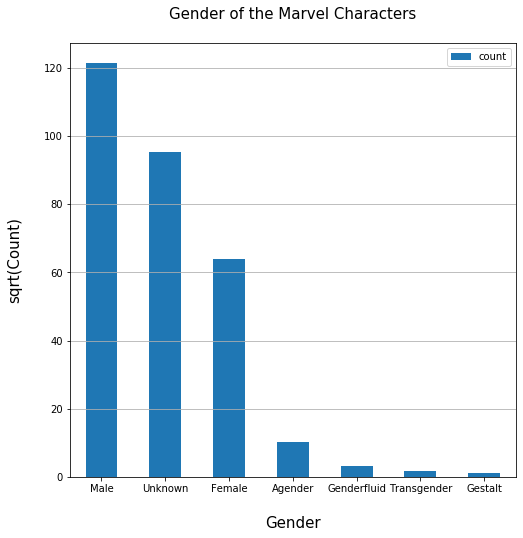

In [219]:
ax = Gender_df.plot.bar(x='Gender', y='count', rot=0, figsize=(8,8))
ax.set_xlabel('\nGender', fontsize=15)
ax.set_ylabel('sqrt(Count)\n', fontsize=15)
ax.set_title('Gender of the Marvel Characters\n', fontsize=15)
plt.grid(axis='y')

In [233]:
gender_VS_eye = personnage[['Gender','Eyes','Real Name']].groupby(['Gender','Eyes']).count()\
                                                         .rename(columns={'Real Name':'Count'})\
                                                         .sort_values(by='Gender', ascending=False)#\
                                                         #.reset_index()
gender_VS_eye

Count
Gender  Eyes                                                     
Unknown Yellow                                                 15
        No Eyes                                                13
        , with yellow iris                                      1
        Black                                                  19
        Black ; red when using powers; green                    1
...                                                           ...
Agender Variable White bonded to MulliganBlack and Red ...      1
        White                                                  14
        White Or redWhite or yellow when bonded to Carn...      1
        Yellow                                                  6
        Black                                                   9

[669 rows x 1 columns]

In [ ]:
dblp.groupby('conference').count().drop(['year','title'],axis=1).rename(columns={'authors':'num-papers'}).sort_values(by='num-papers', ascending=False)

In [183]:
personnage['Occupation'].value_counts().head(50)

Unknown                  8701
Student                   645
Criminal                  601
Scientist                 428
Adventurer                322
Mercenary                 294
Soldier                   248
Terrorist                 237
Warrior                   229
Reporter                  205
Spy                       160
Assassin                  125
Businessman               109
Lawyer                     94
Doctor                     86
Sorcerer                   83
Government agent           81
Crimelord                  80
Thief                      80
Actor                      77
Mobster                    67
Housewife                  65
Rancher                    61
Politician                 61
Spy; Soldier               58
Magician                   56
Police officer             53
Vigilante                  52
Monarch                    50
S.H.I.E.L.D. agent         50
Pirate                     50
Professional criminal      49
Outlaw                     49
Gangster  

In [162]:
personnage[personnage['Real Name'].str.contains('Stark')]

,URL,Real Name,Identity,Current Alias,Citizenship,Marital Status,Occupation,Education,Gender,Height,Weight,Eyes,Hair,Place of Birth
1201,/wiki/Anthony_Stark_(Onslaught_Reborn)_(Earth-...,Anthony Edward Stark,Secret Identity,Iron Man,American,Single,"Adventurer, Inventor, Industrialist",Multiple PhDs in Physics and Electrical Engine...,Male,Unknown,Unknown,Blue,Black,Second Counter Earth
1225,/wiki/Anthony_Stark_(Third_A.I.)_(Earth-616),"Anthony ""Tony"" Stark",No Dual Identity,Unknown,American,Single,Virtual Assistant,Unknown,Male,Unknown,Unknown,No Eyes,No Hair,Unknown
1230,/wiki/Anthony_Stark_(Fourth_A.I.)_(Earth-616),"Anthony ""Tony"" Stark",No Dual Identity,Unknown,American,Single,Virtual Assistant,Unknown,Male,Unknown,Unknown,No Eyes,No Hair,Unknown
1290,/wiki/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",Public Identity,Iron Man,"American, Bulgarian",Single,"Mechanical Engineer, adventurer, inventor, ind...","MIT (Massachusetts Institute of Technology), m...",Male,"6' 1"" (1.85 m) (without armor); 6'6"" (includi...",225 lbs (102 kg) (without armor); 425 lbs (193...,Blue,Black,"Sofia, Bulgaria"
1624,/wiki/Arno_Stark_(Earth-616),Arno Stark,No Dual Identity,Unknown,American,Single,Custodian of Troy,Unknown,Male,Unknown,Unknown,Blue,Black,"Long Island, New York"
3631,/wiki/Caleb_Starke_(Earth-616),Caleb Starke,No Dual Identity,Unknown,British,Unknown,Leader of a religious sect,Unknown,Male,Unknown,Unknown,Unknown,Unknown,Unknown
4406,/wiki/Charlie_Stark_(Earth-616),Charlie Stark,No Dual Identity,Unknown,American,Unknown,Rancher,Unknown,Male,Unknown,Unknown,Unknown,Brown,Unknown
5671,/wiki/Dargo_Stark_(Warp_World)_(Earth-616),Dargo Stark,Secret Identity,Iron Hammer 2099,"Asgardian, Norwegian",Single,"Adventurer, Businessman",Unknown,Male,Unknown,Unknown,Blue,Blond,Unknown
8478,/wiki/Friday_Stark_(Earth-616),Friday Stark,No Dual Identity,Unknown,American,Single,Secretary,Unknown,Female,Unknown,Unknown,Red,Blond,Unknown
10785,/wiki/Howard_Stark_(Earth-616),Howard Anthony Walter Stark,No Dual Identity,Unknown,American,Married,"Former CEO of Stark Enterprises, Adventurer, I...",Advanced degree in physics and mechanical engi...,Male,"6' 0"" (1.83 m)",170 lbs (77 kg),Blue,Grey ; White at temples; formerly Black,"Richford, New York"


***Loading and cleaning the DC dataset***

In [77]:
dc_pers = pd.read_pickle("perso_dc.txt")
dc_pers_df = pd.DataFrame(dc_pers[0])
dc_pers_df_1 = pd.DataFrame(dc_pers[1])
#Concatenate both dataframes
dc_pers_df = pd.concat([dc_pers_df, dc_pers_df_1], ignore_index=True)
dc_pers_df.head(20)

,URL,Real Name,Identity,Current Alias,Citizenship,Good or Bad,Marital Status,Occupation,Education,Gender,Height,Weight,Eyes,Hair,Place of Birth
0,https://dc.fandom.com//wiki/Adam_Blake_(The_Nail),Adam Blake,Secret Identity,Captain Comet,,Good,,,,Male,,,Hazel,Brown,
1,https://dc.fandom.com//wiki/Ada_LaBostrie_(New...,Ada LaBostrie,Public Identity,Ada LaBostrie,American,Good,Married,Housewife,,Female,,,Brown,Black,
2,https://dc.fandom.com//wiki/Adellca_(New_Earth),Adellca,Secret Identity,Green Lantern,,Good,Single,Green Lantern,,Female,,,Black,Black,
3,https://dc.fandom.com//wiki/A-1_(Prime_Earth),Artificial Intelligence Data Flow,,A-I,,Good,Single,,,,,,,,
4,https://dc.fandom.com//wiki/Ace_Egan_(Quality_...,Ace Egan,Secret Identity,Ace of Space,,Good,,,,Male,,,,,New York
5,https://dc.fandom.com//wiki/Abigail_Cable_(The...,Abigail Cable,,,,Good,,,,Female,,,Blue,White,
6,https://dc.fandom.com//wiki/Abraham_Arlington_...,Abraham Arlington,,Azrael,British,Good,,,,Male,,,,,
7,https://dc.fandom.com//wiki/Abisha_(Prime_Earth),Abisha (surname unknown),Public Identity,Abisha,,Good,Single,Bodyguard,,Male,,,Black,Bald,
8,https://dc.fandom.com//wiki/Alan_Scott_(DC_Uni...,Alan Scott,Secret Identity,Green Lantern,American,Good,,,,Male,,,,Blond,
9,https://dc.fandom.com//wiki/Adam_Strange_(Kryp...,Adam Strange,Public Identity,,American,Good,,,College (abandoned),Male,,,Blue,Light Brown,Earth


***Let us clean the data set, starting with the Real Name column***

In [90]:
print('Missing Values : {}'.format(dc_pers_df['Real Name'].isnull().sum()))
dc_pers_df['Real Name'].value_counts()

Missing Values : 0


Unknown                  4335
Bruce Wayne               164
Kal-El                    118
Lois Lane                  86
None                       75
                         ... 
Aldar                       1
Peter Cross                 1
Nathan Ellery               1
Rhent Ustin                 1
Abdul, Son of Ali Bey       1
Name: Real Name, Length: 10877, dtype: int64

In [96]:
dc_pers_df["Real Name"] = dc_pers_df["Real Name"].str.replace(r'\s\[\d\]', '')
dc_pers_df["Real Name"] = dc_pers_df["Real Name"].str.replace(r'\[\d\]', '')
dc_pers_df.loc[dc_pers_df['Real Name']=='None', 'Real Name'] ='Unknown'
dc_pers_df.loc[dc_pers_df['Real Name']=='', 'Real Name'] ='Unknown'
dc_pers_df['Real Name'].value_counts()

Unknown                         4502
Bruce Wayne                      164
Kal-El                           118
Lois Lane                         86
Alfred Pennyworth                 64
                                ... 
Alva Xar                           1
Fanny Flipper                      1
Carol Carter                       1
Archibald Tipple                   1
Marianne (last name unknown)       1
Name: Real Name, Length: 10858, dtype: int64

***Identity***